In [27]:
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
df_clstat = pd.read_csv('climbing_statistics.csv') 
df_w = pd.read_csv('Rainier_Weather.csv')       

In [2]:
#Датасет взят с Kaggle.com. 
#Дс содержит данные о попытках восхождения на ряд вершин в период с 2014 по 2015гг и погодные условия в данный период.
#Целью исследования является установить статистическую связь между успешными попытками восхождения и различными климатическими факторами
#

In [3]:
df_route = pd.DataFrame({'Route':df_clstat.Route.unique()})
df_route.index = np.arange(1, len(df_route)+1)
df_clstat['Route'].value_counts()

Disappointment Cleaver              2728
Emmons-Winthrop                      632
Kautz Glacier                        182
Gibralter Ledges                      76
Little Tahoma                         70
Liberty RIngraham Directge            69
glacier only - no summit attempt      66
Fuhrer's Finger                       65
Ingraham Direct                       53
Unknown                               32
Fuhrers Finger                        27
Ptarmigan RIngraham Directge          22
Kautz Cleaver                         14
Tahoma Glacier                        11
Success Cleaver                        6
Gibralter Chute                        5
Mowich Face                            4
Sunset RIngraham Directge              3
Edmonds HW                             2
Curtis RIngraham Directge              2
Nisqually Glacier                      2
Wilson Headwall                        2
Kautz Headwall                         1
Tahoma Cleaver                         1
Liberty Wall    

In [4]:
df_clstat['Date'] =pd.to_datetime(df_clstat.Date)
df_w['Date'] =pd.to_datetime(df_w.Date)
df = pd.merge(df_clstat, df_w, on = 'Date', how = 'outer',validate = 'm:1')
df=df.loc[(df['Route']=='Disappointment Cleaver')&(df['Temperature AVG'] >=0)]


In [5]:
#Разбил датасет на множество д-фреймов по месяцам

In [6]:
df_14_12 = df.loc[(df_clstat['Date']>='2014-12-01')&(df['Date']<='2014-12-31')]
df_14_11 = df.loc[(df_clstat['Date']>='2014-11-01')&(df['Date']<='2014-11-30')]
df_14_10 = df.loc[(df_clstat['Date']>='2014-10-01')&(df['Date']<='2014-10-31')]
df_14_9 = df.loc[(df['Date']>='2014-9-01')&(df['Date']<='2014-9-30')]


In [7]:
df_15_12 = df.loc[(df['Date']>='2015-12-01')&(df['Date']<='2015-12-31')]
df_15_11 = df.loc[(df['Date']>='2015-11-01')&(df['Date']<='2015-12-30')]
df_15_10 = df.loc[(df['Date']>='2015-10-01')&(df['Date']<='2015-10-31')]
df_15_9 = df.loc[(df['Date']>='2015-9-01')&(df['Date']<='2015-9-30')]
df_15_8 = df.loc[(df['Date']>='2015-8-01')&(df['Date']<='2015-8-31')]
df_15_7 = df.loc[(df['Date']>='2015-7-01')&(df['Date']<='2015-7-31')]
df_15_6 = df.loc[(df['Date']>='2015-6-01')&(df['Date']<='2015-6-30')]
df_15_5 = df.loc[(df['Date']>='2015-5-01')&(df['Date']<='2015-5-31')]
df_15_4 = df.loc[(df['Date']>='2015-4-01')&(df['Date']<='2015-4-30')]
df_15_3 = df.loc[(df['Date']>='2015-3-01')&(df['Date']<='2015-3-31')]
df_15_2 = df.loc[(df['Date']>='2015-2-01')&(df['Date']<='2015-2-28')]
df_15_1 = df.loc[(df['Date']>='2015-1-01')&(df['Date']<='2015-1-31')]


In [8]:
def coeff (x,y):
    b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
    b0 = np.mean(y) - b1 * np.mean(x)
    R = r2(y,b0+b1*x)
    return R

In [9]:
"""
Т.к. больше 50% датасета описывает события по Dissapointment Cleaver, 
было решено анализировать только показатели по этой вершине.
"""

'\nТ.к. больше 50% датасета описывает события по Dissapointment Cleaver, \nбыло решено анализировать только показатели по этой вершине.\n'

In [10]:
def stat_an(df):
    y_1 = df['Success Percentage']
    y_2 = df['Attempted']
    x_1 = df['Battery Voltage AVG']
    x_2 = df['Temperature AVG']
    x_3 = df['Relative Humidity AVG']
    x_4 = df['Wind Speed Daily AVG']
    x_5 = df['Wind Direction AVG']
    x_6 = df['Solare Radiation AVG']
    R_SP = {'Battery Voltage_R':coeff(x_1,y_1), 
            'Temperature_R':coeff(x_2,y_1),
            'Relative Humidity_R':coeff(x_3,y_1),
            'Wind Speed Daily_R':coeff(x_4,y_1),
            'Wind Direction_R':coeff(x_5,y_1), 
            'Solare Radiation_R':coeff(x_6,y_1)}
    R_A = {'Battery Voltage_R':coeff(x_1,y_2), 
            'Temperature_R':coeff(x_2,y_2),
            'Relative Humidity_R':coeff(x_3,y_2),
            'Wind Speed Daily_R':coeff(x_4,y_2),
            'Wind Direction_R':coeff(x_5,y_2), 
            'Solare Radiation_R':coeff(x_6,y_2)}
    
    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.bar(R_SP.keys(), R_SP.values(), label = 'Success Percentage', width = 0.4, color = 'gray', alpha=0.5)
    ax.bar(R_A.keys(), R_A.values(), label = 'Attempted', width = 0.2, color = 'red', alpha=0.5)
    fig.set_size_inches(12, 5)
    plt.title('R2 values')
    plt.legend()
    return R_SP, R_A

({'Battery Voltage_R': 1.0,
  'Temperature_R': 1.0,
  'Relative Humidity_R': 1.0,
  'Wind Speed Daily_R': 1.0,
  'Wind Direction_R': 1.0,
  'Solare Radiation_R': 1.0},
 {'Battery Voltage_R': 0.006184221880058183,
  'Temperature_R': 0.20017686047461258,
  'Relative Humidity_R': 0.04395237602159319,
  'Wind Speed Daily_R': 0.15903271362699467,
  'Wind Direction_R': 0.2940696239582037,
  'Solare Radiation_R': 0.019520574878057695})

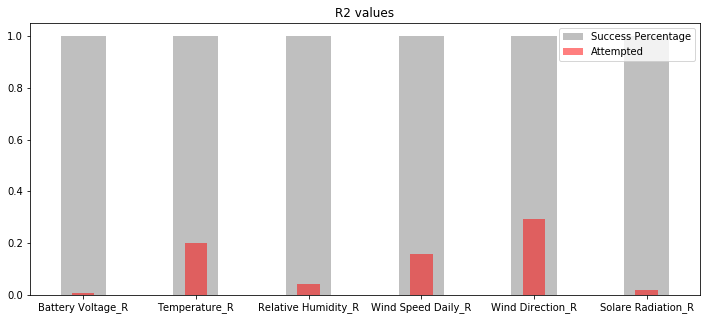

In [11]:
stat_an(df_15_3) 

({'Battery Voltage_R': 0.2572851224970748,
  'Temperature_R': 0.025616344818818693,
  'Relative Humidity_R': 0.1478182805217959,
  'Wind Speed Daily_R': 0.004091843902030101,
  'Wind Direction_R': 0.05875781478961495,
  'Solare Radiation_R': 0.03087118416905099},
 {'Battery Voltage_R': 0.12733855916473746,
  'Temperature_R': 0.06668913391618014,
  'Relative Humidity_R': 0.16468195036894417,
  'Wind Speed Daily_R': 0.21999267945229417,
  'Wind Direction_R': 0.024576833033003176,
  'Solare Radiation_R': 0.2514566451794372})

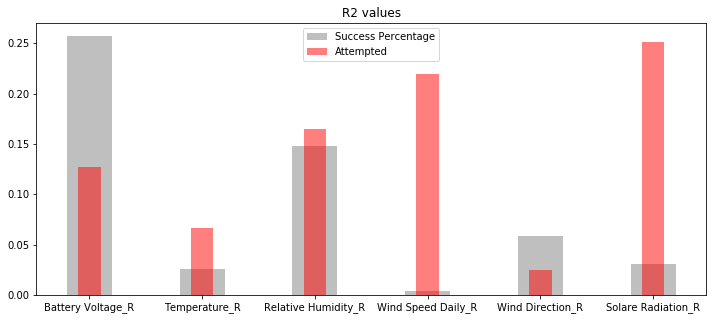

In [12]:
stat_an(df_15_4)

({'Battery Voltage_R': 0.02125873778380405,
  'Temperature_R': 0.032308358388588254,
  'Relative Humidity_R': 0.0005757275068241086,
  'Wind Speed Daily_R': 0.0034746765497247756,
  'Wind Direction_R': 0.0012151706975918053,
  'Solare Radiation_R': 0.004097977508384365},
 {'Battery Voltage_R': 0.011196879411243366,
  'Temperature_R': 0.0461141638410979,
  'Relative Humidity_R': 0.03359592005380374,
  'Wind Speed Daily_R': 0.011538127835267198,
  'Wind Direction_R': 0.014341002457926688,
  'Solare Radiation_R': 0.011878496754297418})

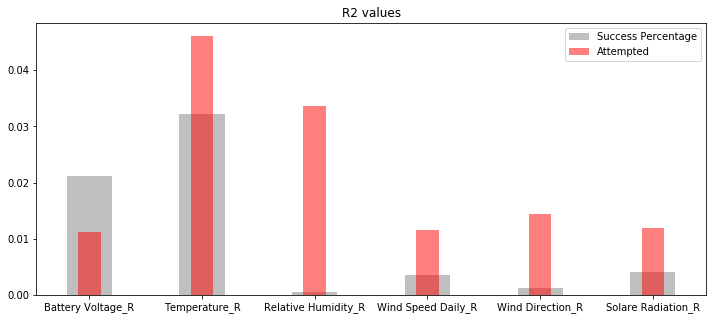

In [13]:
stat_an(df_15_5)

({'Battery Voltage_R': 0.0021678726207075005,
  'Temperature_R': 0.0050337913013341895,
  'Relative Humidity_R': 8.97618578845627e-05,
  'Wind Speed Daily_R': 0.013279688565256409,
  'Wind Direction_R': 0.011781087217637709,
  'Solare Radiation_R': 0.007868664669621217},
 {'Battery Voltage_R': 0.002549662319556667,
  'Temperature_R': 0.0012811805025799705,
  'Relative Humidity_R': 0.002834275725412616,
  'Wind Speed Daily_R': 0.00629087850656973,
  'Wind Direction_R': 0.00031852504029772355,
  'Solare Radiation_R': 0.012579411286180009})

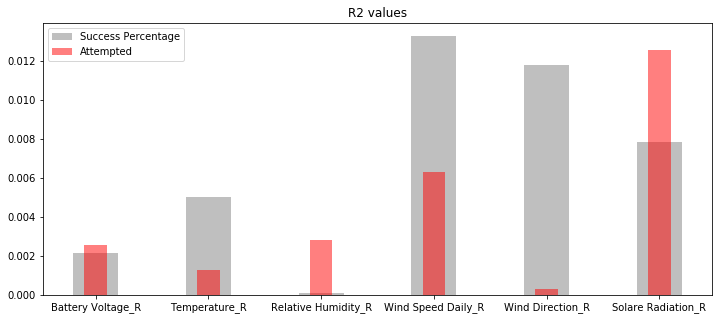

In [14]:
stat_an(df_15_6)

({'Battery Voltage_R': 0.0005988285270620564,
  'Temperature_R': 9.778918001912551e-06,
  'Relative Humidity_R': 0.0006651465196491069,
  'Wind Speed Daily_R': 0.006805090853030826,
  'Wind Direction_R': 0.0033124122328219707,
  'Solare Radiation_R': 0.00243224351947513},
 {'Battery Voltage_R': 0.0003229724370626963,
  'Temperature_R': 0.0014894566012465527,
  'Relative Humidity_R': 0.0027611552888490154,
  'Wind Speed Daily_R': 0.0008091247670469759,
  'Wind Direction_R': 0.002646541023268223,
  'Solare Radiation_R': 2.5237424358004468e-05})

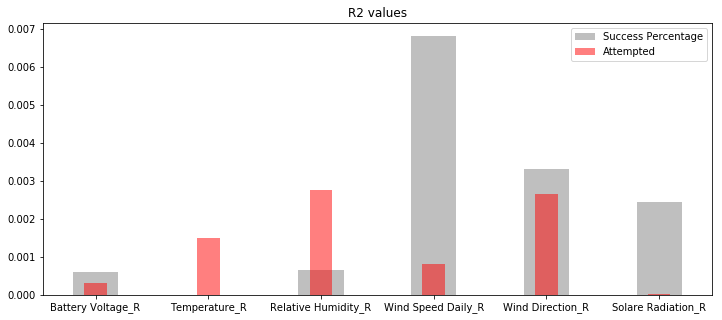

In [15]:
stat_an(df_15_7)

({'Battery Voltage_R': 0.008051814989094463,
  'Temperature_R': 0.016208052756113034,
  'Relative Humidity_R': 0.0757333615881648,
  'Wind Speed Daily_R': 0.007157005560632368,
  'Wind Direction_R': 0.01784791780018813,
  'Solare Radiation_R': 0.03024881461769191},
 {'Battery Voltage_R': 0.008817190476025916,
  'Temperature_R': 0.013325397781901449,
  'Relative Humidity_R': 0.04107707631242208,
  'Wind Speed Daily_R': 0.031806097922178256,
  'Wind Direction_R': 0.006990334439384349,
  'Solare Radiation_R': 0.03335885423003759})

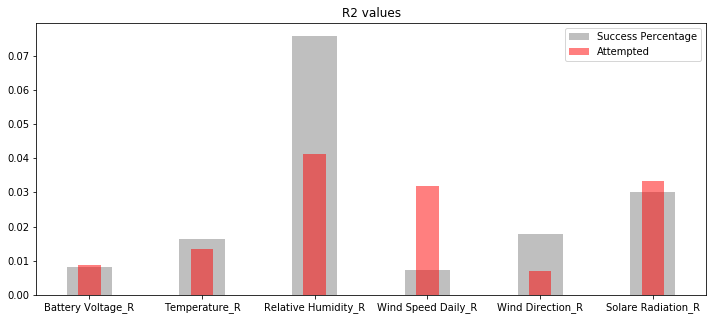

In [16]:
stat_an(df_15_8)

({'Battery Voltage_R': 0.038303616547487596,
  'Temperature_R': 0.012800977756434961,
  'Relative Humidity_R': 0.036874190142235364,
  'Wind Speed Daily_R': 0.0022006713011654133,
  'Wind Direction_R': 0.007310731714016638,
  'Solare Radiation_R': 0.09583155686243916},
 {'Battery Voltage_R': 0.010932999534682297,
  'Temperature_R': 0.016130891216035503,
  'Relative Humidity_R': 0.037211957830389,
  'Wind Speed Daily_R': 0.05398336035244844,
  'Wind Direction_R': 0.006525139116795642,
  'Solare Radiation_R': 0.006824197459935677})

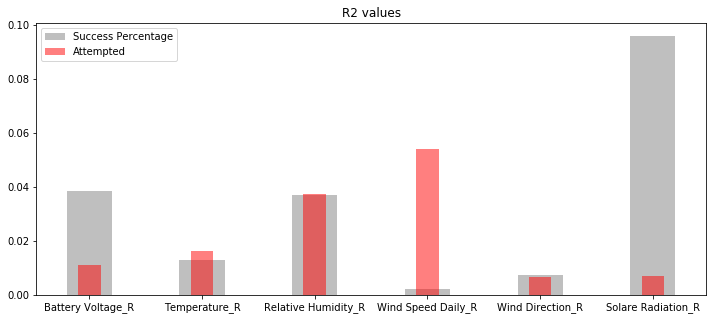

In [17]:
stat_an(df_15_9)

({'Battery Voltage_R': 1.0,
  'Temperature_R': 1.0,
  'Relative Humidity_R': 1.0,
  'Wind Speed Daily_R': 1.0,
  'Wind Direction_R': 1.0,
  'Solare Radiation_R': 1.0},
 {'Battery Voltage_R': 0.17038054000774472,
  'Temperature_R': 0.2203844482836732,
  'Relative Humidity_R': 0.05615506582166274,
  'Wind Speed Daily_R': 0.05348650315566861,
  'Wind Direction_R': 0.3704320301762104,
  'Solare Radiation_R': 0.1519991476119592})

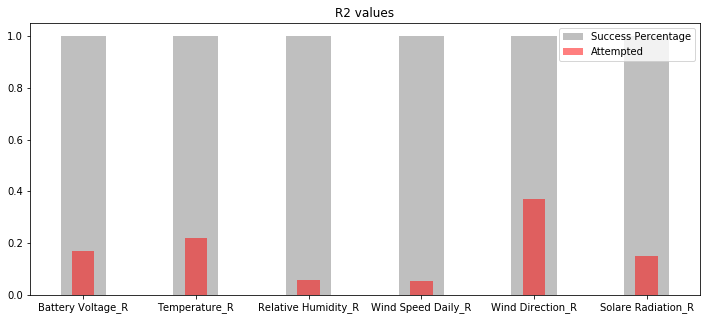

In [18]:
stat_an(df_15_10)

({'Battery Voltage_R': 0.0005735623651629274,
  'Temperature_R': 0.009306759522891617,
  'Relative Humidity_R': 0.006950191418259699,
  'Wind Speed Daily_R': 0.013533197643522454,
  'Wind Direction_R': 0.0015633859885316737,
  'Solare Radiation_R': 0.026479379111819745},
 {'Battery Voltage_R': 0.0011102609766340255,
  'Temperature_R': 0.0047759655751234975,
  'Relative Humidity_R': 0.013554275100258306,
  'Wind Speed Daily_R': 0.008596970959388384,
  'Wind Direction_R': 4.9859070498592395e-05,
  'Solare Radiation_R': 0.005614069662354559})

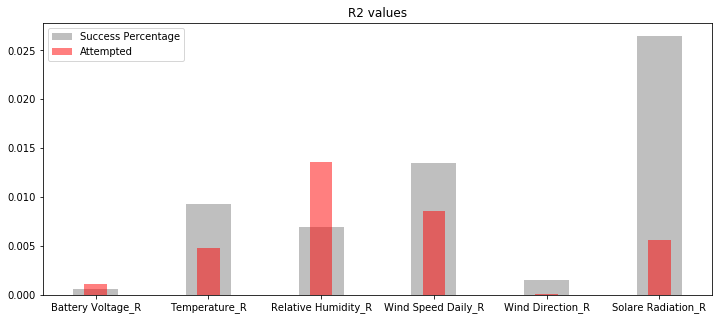

In [19]:
stat_an(df)

In [20]:
"""
Расчет коэффициента детерминации показал, что процент успешных возхождений, 
а так же количество попыток восхождения не зависит от климатических факторов,
за исключением марта и октября 2015г, где показатель успешных восхождений равен нулю.
"""

'\nРасчет коэффициента детерминации показал, что процент успешных возхождений, \nа так же количество попыток восхождения не зависит от климатических факторов,\nза исключением марта и октября 2015г, где показатель успешных восхождений равен нулю.\n'

In [21]:
'''
Далее проведем однофакторный дисперсионный для анализа статистических отличий 
между попытками удачного восхождения и количеством восхождений в зависимости от врмени года. 
'''

'\nДалее проведем однофакторный дисперсионный для анализа статистических отличий \nмежду попытками удачного восхождения и количеством восхождений в зависимости от врмени года. \n'

In [22]:
def dis_an(fc):
    results = st.f_oneway(df_15_3[fc],
                          df_15_4[fc],
                          df_15_5[fc],
                          df_15_6[fc],
                          df_15_7[fc],
                          df_15_8[fc],
                          df_15_9[fc],
                          df_15_10[fc])
    n = len(df_15_3)+len(df_15_4)+len(df_15_5)+len(df_15_6)+len(df_15_7)+len(df_15_8)+len(df_15_9)+len(df_15_10)
    k = 8
    F_crit = 2.64
    return results

In [23]:
dis_an('Success Percentage'),dis_an('Attempted')


(F_onewayResult(statistic=8.467866261864193, pvalue=3.7181928443158246e-10),
 F_onewayResult(statistic=4.6134455574936375, pvalue=4.149139934150937e-05))

In [24]:
'''
Дисперсионный анализ показал, что различия между месяцами по попыткам восхождения 
и процентом удачных попыток статистичсеки значим при a = 1, так для показаателя 
Success Percentage F= 8.46 > 2.64 pvalue - близок к нулю, 
для Attempted F = 4.61 > 2.64 pvalue - близок к нулю.
'''


'\nДисперсионный анализ показал, что различия между месяцами по попыткам восхождения \nи процентом удачных попыток статистичсеки значим при a = 1, так для показаателя \nSuccess Percentage F= 8.46 > 2.64 pvalue - близок к нулю, \nдля Attempted F = 4.61 > 2.64 pvalue - близок к нулю.\n'

In [25]:
dis_an('Battery Voltage AVG'),dis_an('Temperature AVG'),dis_an('Relative Humidity AVG'),dis_an('Wind Speed Daily AVG'),dis_an('Wind Direction AVG'),dis_an('Solare Radiation AVG')    

(F_onewayResult(statistic=84.93033824673242, pvalue=3.243599088444285e-101),
 F_onewayResult(statistic=63.03486857455865, pvalue=7.561646214288883e-78),
 F_onewayResult(statistic=19.080919224984868, pvalue=2.4209865613199215e-24),
 F_onewayResult(statistic=16.289709095480344, pvalue=1.2398605507987488e-20),
 F_onewayResult(statistic=21.52724779458516, pvalue=1.440463045822302e-27),
 F_onewayResult(statistic=205.17030930654053, pvalue=5.092750644380934e-203))

In [26]:
'''
Дисперсионный анализ показал, что изменение погодных условий в течении года, 
так же статистичсеки значимы, т.к. все показатели F больше табличных
'''

'\nДисперсионный анализ показал, что изменение погодных условий в течении года, \nтак же статистичсеки значимы, т.к. все показатели F больше табличных\n'

In [ ]:
"""
Т.к. изменение искомых искомых значений и факторы имеют статистическую значимость,
попробуеем расчитать коэффициенты для нескольких факторов, возьмем значения Bfttery Voltsge AVG,
Temperature AVG и Solar Radiation AVG, т.к. они меют наибольшие показатели R, F, pvalue.
"""

In [95]:
def new_stat_an(df):
    x = df.iloc[:,5:]
    x = x.drop(['Wind Speed Daily AVG'], axis=1)
    x = x.drop(['Relative Humidity AVG'], axis=1)
    x = x.drop(['Wind Direction AVG'], axis=1)
    
    y_a = df.iloc[:,3]
    y_sp = df.iloc[:,4]

    new_coef_a = lm.LinearRegression()
    new_coef_sp = lm.LinearRegression()
    
    new_coef_a.fit(x, y_a)
    new_coef_sp.fit(x, y_sp)
    
    y_pred_a = new_coef_a.intercept_+new_coef_a.coef_[0]*x['Battery Voltage AVG']+new_coef_a.coef_[1]*x['Temperature AVG']+new_coef_a.coef_[2]*x['Solare Radiation AVG']
    y_pred_sp = new_coef_sp.intercept_+new_coef_sp.coef_[0]*x['Battery Voltage AVG']+new_coef_sp.coef_[1]*x['Temperature AVG']+new_coef_sp.coef_[2]*x['Solare Radiation AVG']
    
    R_A = r2(y_a,y_pred_a)
    R_SP = r2(y_sp,y_pred_sp)
    
    return R_A, R_SP

In [100]:
r_sp = {'Mar':new_stat_an(df_15_3)[1],
        'Apr':new_stat_an(df_15_4)[1],
        'May':new_stat_an(df_15_5)[1],
        'Jun':new_stat_an(df_15_6)[1],
        'Jul':new_stat_an(df_15_7)[1],
        'Aug':new_stat_an(df_15_8)[1],
        'Sep':new_stat_an(df_15_9)[1],
        'Oct':new_stat_an(df_15_10)[1],
        'Nov':new_stat_an(df_15_11)[0]}
r_a = {'Mar':new_stat_an(df_15_3)[0],
        'Apr':new_stat_an(df_15_4)[0],
        'May':new_stat_an(df_15_5)[0],
        'Jun':new_stat_an(df_15_6)[0],
        'Jul':new_stat_an(df_15_7)[0],
        'Aug':new_stat_an(df_15_8)[0],
        'Sep':new_stat_an(df_15_9)[0],
        'Oct':new_stat_an(df_15_10)[0],
        'Nov':new_stat_an(df_15_11)[0]}

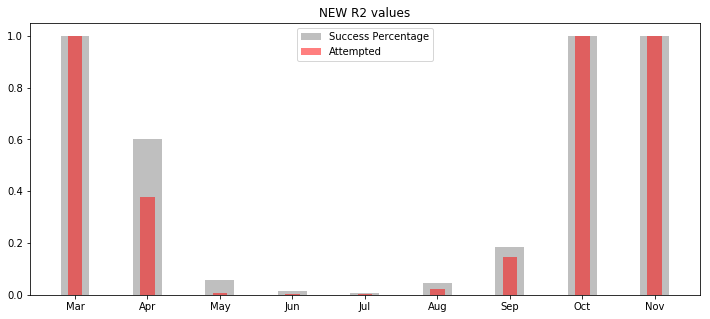

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.bar(r_sp.keys(), r_sp.values(), label = 'Success Percentage', width = 0.4, color = 'gray', alpha=0.5)
ax.bar(r_a.keys(), r_a.values(), label = 'Attempted', width = 0.2, color = 'red', alpha=0.5)
fig.set_size_inches(12, 5)
plt.title('NEW R2 values')
plt.legend()


In [ ]:
'''
Вывод:
Влияние одиночных климатических факторов на удачный исход восхождения 
очень мало,но так как прослеживается сезонная тенденция изменения 
показателей попыток восхождения и удачных попыток, 
то можно сделать вывод, что все же есть связь между исследуемыми значениями,
хоть и крайне малая, что отображено на графике.
Не смотря на то, что кол-во наблюдений в период с октября по март не велико, приняли данные 
значения во внимание, т.к. именно в это время в высокогорье начинаются обильные снегопады,
что и оказывает прямое влияние на количество попыток восхождения, в летний же период, влияние
климатических факторов крайне мало и не принимается во внимание, т.к. альпинисты люди с атрофированным 
инстинктом самосохранения и сильно целеустремленные, такие показатели как влажность, ветер, 
'Battery Voltage'(что бы это не значило) во внимание не берется.)  
'''